# Motivation and Problem Statement

For my MATH 104B final project, I chose to focus on portfolio optimization and modern portfolio theory. The modern portfolio theory refers to the objective of maximizing returns for a given risk. More specifically, I am interested in determining the minimum variance portfolio. The concept of the minimum variance portfolio stems from the goal to maximize returns while minimizing risk. The return, in this case, refers to the portfolio's expected rate of return $\mu_p$ while the risk refers to its standard deviation $\sigma_p$. This can be achieved by transforming the Markowitz Problem into an optimization problem with the use of the Method of Lagrange Multipliers. This optimization problem can then be solved using linear systems and matrix algebra along with the gaussian elimination with backward substitution algorithm. 

To expand my knowledge with a real-world application, I decided to find the minimum variance portfolio of selected stocks active between 2014 and 2018 using data from Yahoo Finance. I also determined the changes of the frontier portfolio graph that resulted from adding one more asset to the portfolio. Thus, my report answers the following questions:
- What is the minimum variance portfolio for two selected assets (Apple and Google)? 
- What is the minimum variance portfolio for three selected assets (Apple, Google, and Meta)? 
- How does adding an asset change the frontier portfolio graph?

The cell below imports the packages I used throughout this project.

In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr
import yfinance as yfin
from PIL import Image
%matplotlib inline

# Methods and Validation

Let $\omega_i$ be the weight of the $\mathrm{i}^{\text {th }}$ asset in a portfolio where
\begin{align}
\sum_{i=1}^n \omega_i=1 .
\end{align}

The rate of return for the $\mathrm{i}^{\text {th }}$ asset is denoted as $\rho_i$. Then, the expected rate of return for the $\mathrm{i}^{\text {th }}$ asset is defined as follows:
\begin{align}
\mu_i=E\left[\rho_i\right].
\end{align}

Similarly, the rate of return for a portfolio is denoted as $\rho_p$ and the expected rate of return for a portfolio is defined as follows:
$$\mu_p=\sum_{i=1}^n \omega_i \mu_i$$

The covariance for the returns of the $\mathrm{i}^{\text {th }}$ and $\mathrm{j}^{\text {th }}$ asset is given by
$$
\sigma_{i, j}=E\left[\left(\rho_i-\mu_i\right)\left(\rho_j-\mu_j\right)\right].
$$
This implies the covariance matrix $V$ where
$$
V=\left[\begin{array}{cccc}
\sigma_{1,1} & \sigma_{1,2} & \ldots & \sigma_{1, n} \\
\sigma_{2,1} & \sigma_{2,2} & \ldots & \sigma_{2, n} \\
\vdots & \vdots & \ddots & \vdots \\
\sigma_{n, 1} & \sigma_{n, 2} & \ldots & \sigma_{n, n}
\end{array}\right] .
$$
Note from above that $\sigma_{i, j}=\sigma_{j, i}$ and that $\sigma_{i, i}=\sigma_i^2=\operatorname{Var}\left(\rho_i\right)=E\left[\left(\rho_i-\mu_i\right)^2\right]$ when $i=j$.

Also note that the standard deviation for the $\mathrm{i}^{\text {th }}$ asset is $\sigma_i=\sqrt{\operatorname{Var}\left(\rho_i\right)}$.


Similarly, the variance for the rate of return of the portfolio can be written as follows:
$$
\sigma_p^2=E\left[\left(\rho_p-\mu_p\right)^2\right]=\boldsymbol{w}^T V \boldsymbol{w}
$$
where $w^T=\left[\omega_1, \omega_2, \ldots, \omega_n\right]$.


Using the above definitions and equations, the Markowitz problem can be solved as an optimization problem:
$$
\begin{aligned}
\operatorname{minimize} \frac{1}{2} \boldsymbol{w}^T V \boldsymbol{w} \\
\text { subject to the following: } g_1 &= \sum_{i=1}^n \omega_i \mu_i-\mu_p=0 \\
g_2 & =\sum_{i=1}^n \omega_i-1=0 .
\end{aligned}
$$


One way to solve this is to use the Method of Lagrange Multipliers.

The general function for the Lagrangian in this context is as follows:
$$
L\left(\boldsymbol{w} \mid \lambda_1, \lambda_2\right)=f(\boldsymbol{w})-\lambda_1 g_1(\boldsymbol{w})-\lambda_2 g_2(\boldsymbol{w}).
$$

Note that the constraints of the Method of Lagrange Multipliers are satisfied for this optimization problem to find the minima since the constraints $g_1=g_2=0$.

Thus, $\left(\boldsymbol{w}, \lambda_1, \lambda_2\right)$ as a critical point of $\mathrm{L}$ is defined as follows:
$$
\frac{\partial L}{\partial \boldsymbol{w}}=\nabla_{\boldsymbol{w}} L=\left[\begin{array}{c}
\frac{\partial L}{\partial w_1} \\
\frac{\partial L}{\partial w_2} \\
\vdots \\
\frac{\partial L}{\partial w_n}
\end{array}\right]=0
$$
and $\frac{\partial L}{\partial \lambda_1}=0, \frac{\partial L}{\partial \lambda_2}=0$.

After substituting and rearranging, the Lagrangian becomes
$$
L\left(\boldsymbol{w}, \lambda_1, \lambda_2\right)=\frac{1}{2} \boldsymbol{w}^T V \boldsymbol{w}+\lambda_1\left(\mu_p-\boldsymbol{w}^T \boldsymbol{\mu}\right)+\lambda_2\left(1-\boldsymbol{w}^T \mathbf{1}\right)
$$
in which
$$
\begin{gathered}
\nabla_{\boldsymbol{w}} L=V \boldsymbol{w}_p-\lambda_1 \boldsymbol{\mu}-\lambda_2 \mathbf{1}=0 \\
\frac{\partial L}{\partial \lambda_1}=\mu_p-\boldsymbol{w}_p^T \boldsymbol{\mu}=0 \\
\frac{\partial L}{\partial \lambda_2}=1-\boldsymbol{w}_p^T \mathbf{1}=0 .
\end{gathered}
$$

As a result, the problem can be transformed as shown below:
$$
V \boldsymbol{w}_p=\lambda_1 \boldsymbol{\mu}+\lambda_2 \mathbf{1}.
$$

This leads to the following linear system:
$$
\begin{aligned}
\left(\boldsymbol{\mu}^T V^{-1} \boldsymbol{\mu}\right) \lambda_1+\left(\boldsymbol{\mu}^T V^{-1} \mathbf{1}\right) \lambda_2 & =\mu_p \\
\left(\mathbf{1}^T V^{-1} \boldsymbol{\mu}\right) \lambda_1+\left(\mathbf{1}^T V^{-1} \mathbf{1}\right) \lambda_2 & =1
\end{aligned}
$$
and its matrix form:
$$
\left[\begin{array}{cc}
\boldsymbol{\mu}^T V^{-1} \boldsymbol{\mu} & \boldsymbol{\mu}^T V^{-1} \mathbf{1} \\
\mathbf{1}^T V^{-1} \boldsymbol{\mu} & \mathbf{1}^T V^{-1} \mathbf{1}
\end{array}\right]\left[\begin{array}{c}
\lambda_1 \\
\lambda_2
\end{array}\right]=\left[\begin{array}{c}
\mu_p \\
1
\end{array}\right]
$$
Note that
$$
\boldsymbol{\mu}^T V^{-1} \mathbf{1}=\mathbf{1}^T V^{-1} \boldsymbol{\mu}.
$$
Then the previous matrix representation can be rewritten to
$$
\left[\begin{array}{ll}
B & A \\
A & C
\end{array}\right]\left[\begin{array}{l}
\lambda_1 \\
\lambda_2
\end{array}\right]=\left[\begin{array}{c}
\mu_p \\
1
\end{array}\right]
$$
where
$$
\left[\begin{array}{ll}
B & A \\
A & C
\end{array}\right]=\left[\begin{array}{ll}
\boldsymbol{\mu}^T V^{-1} \boldsymbol{\mu} & \boldsymbol{\mu}^T V^{-1} \mathbf{1} \\
\mathbf{1}^T V^{-1} \boldsymbol{\mu} & \mathbf{1}^T V^{-1} \mathbf{1}
\end{array}\right].
$$

The gaussian elimination with backward substitution algorithm can solve this matrix:

In [2]:
def gebs(A, b):
    n = len(b)
    E = A
    
    for i in range(n):
        for j in range(i+1, n):
            num = E[j][i] / E[i][i]
            
            for k in range(i, n):
                E[j][k] -= num * E[i][k]
            b[j] -= num * b[i]
    
    x = np.zeros(n)
    
    for i in range(n-1, -1, -1):
        
        if E[n-1, n-1] == 0:
            print("No unique solution exists.")
            return
        
        else:
            x[i] = b[i] / E[i][i]
            
        for j in range(i-1, -1, -1):
            b[j] -= E[j][i] * x[i]
    
    return x

It yields that
$$
\begin{aligned}
& \lambda_1=\frac{C \mu_p-A}{D} \\
& \lambda_2=\frac{B-A \mu_p}{D} .
\end{aligned}
$$

The above result can be substituted back into
$$
V \boldsymbol{w}_p=\lambda_1 \boldsymbol{\mu}+\lambda_2 \mathbf{1}
$$
and the gaussian elimination with backward substitution algorithm can be used again to find $\boldsymbol{w}_{\mathrm{p}}$. 

Therefore, we can analytically solve for the weight of each asset in a portfolio $\boldsymbol{w}_{\mathrm{p}}$ using the Method of Lagrange Multipliers. These weights can then be used to calculate the expected rate of return and standard deviation.

# Results and Summary

I created a random weight distribution simulator and used each asset's expected rate of return to later on calculate the portfolio's expected rate of returns $\mu_p$ and risk $\sigma_p$. The frontier portfolio graph below shows my results for Apple and Google from 2014 to 2018.

In [3]:
def mvp_w2(mat, mean1, mean2):
    
    base = mat
    mus = np.array([mean1, mean2])
    inverse = np.linalg.inv(base)
    n = base.shape[0]
    m_ones = np.ones((n, 1))
    
    
    num = len(mus)
    eq_w = 1/num
    
    eq_w_list = [eq_w]
    w_list = np.repeat(eq_w_list, num)

    
    mu_p = np.dot(w_list, mus)

    
    pre_B = np.dot(mus.T, inverse)
    B = np.dot(pre_B, mus)
    B = np.float64(B)
    
    pre_A = np.dot(mus.T, inverse)
    A = np.dot(pre_A, m_ones)
    A = np.float64(A)
    
    pre_C = np.dot(m_ones.T, inverse)
    C = np.dot(pre_C, m_ones)
    C = np.float64(C)
    
    new_mat = [[B,A],[A,C]]
    new_mat = np.array([[B,A],[A,C]], dtype='object')
    
    b_mat = np.array([mu_p,1])
    
    l_mat = gebs(new_mat, b_mat)

    
    l_1 = l_mat[0]

    l_2 = l_mat[1]

    
    part1 = l_1 * mus

    part2 = l_2 * m_ones

    
    combined = part1 + part2
    actual = combined[0]
    
    output = gebs(base, actual)
    
    return output

In [4]:
yfin.pdr_override()
df = pdr.DataReader(['AAPL','GOOG'],start='2014-01-01',end='2019-01-01')

df = df['Adj Close']

cov_matrix = df.pct_change().apply(lambda x: np.log(1+x)).cov()
cov_matrix = np.array(cov_matrix)

actual_weights = mvp_w2(cov_matrix, 0.6, 0.4)

mus = df.resample('Y').last().pct_change().mean()
mus = np.array(mus)

new_mu_p = np.dot(actual_weights, mus)

var = np.dot(np.dot(actual_weights, cov_matrix), actual_weights) ** (1/2) 

[*********************100%***********************]  2 of 2 completed


In [5]:
np.random.seed(9163)

iterations = 100000

num_portfolios = 2

graph_mu = []
graph_sig = []

w = np.random.random((iterations, num_portfolios))
w = w / np.sum(w, axis=1, keepdims=True)

for i in range(len(w)):
    w1 = w[i][0]
    w2 = w[i][1]
    actual_weights = mvp_w2(cov_matrix, w1, w2)
    
    new_mu_p = np.dot(actual_weights, mus)
    graph_mu.append(new_mu_p)
    
    var = np.dot(np.dot(actual_weights, cov_matrix), actual_weights) ** (1/2)
    graph_sig.append(var)

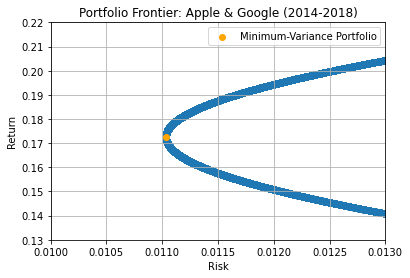

In [6]:
plt.scatter(x=graph_sig, y=graph_mu)
plt.title("Portfolio Frontier: Apple & Google (2014-2018)")
plt.scatter(min(graph_sig), graph_mu[graph_sig.index(min(graph_sig))], c='orange', label='Minimum-Variance Portfolio')
plt.xlim([0.01, 0.013])
plt.ylim([0.13, 0.22])
plt.xlabel('Risk')
plt.ylabel('Return')
plt.grid()
plt.legend()
plt.savefig("output.jpg")

In [7]:
graph_mu[graph_sig.index(min(graph_sig))]

0.1725983495116722

In [8]:
min(graph_sig)

0.01103217323160941

Note that the expected rate of return for the minimum variance portfolio is approximately 0.1726 with a standard deviation of about 0.01103.

The frontier portfolio graph below displays my results for Apple, Google, and Meta from 2014 to 2018.

In [9]:
def mvp_w3(mat, mean1, mean2, mean3):
    
    base = mat
    mus = np.array([mean1, mean2, mean3])
    inverse = np.linalg.inv(base)
    n = base.shape[0]
    m_ones = np.ones((n, 1))
    
    
    num = len(mus)
    eq_w = 1/num
    
    eq_w_list = [eq_w]
    w_list = np.repeat(eq_w_list, num)

    
    mu_p = np.dot(w_list, mus)

    
    pre_B = np.dot(mus.T, inverse)
    B = np.dot(pre_B, mus)
    B = np.float64(B)
    
    pre_A = np.dot(mus.T, inverse)
    A = np.dot(pre_A, m_ones)
    A = np.float64(A)
    
    pre_C = np.dot(m_ones.T, inverse)
    C = np.dot(pre_C, m_ones)
    C = np.float64(C)
    
    new_mat = [[B,A],[A,C]]
    new_mat = np.array([[B,A],[A,C]], dtype='object')
    
    b_mat = np.array([mu_p,1])
    
    l_mat = gebs(new_mat, b_mat)

    
    l_1 = l_mat[0]

    l_2 = l_mat[1]

    
    part1 = l_1 * mus

    part2 = l_2 * m_ones

    
    combined = part1 + part2
    actual = combined[0]
    
    output = gebs(base, actual)
    
    return output

In [11]:
yfin.pdr_override()
df = pdr.DataReader(['AAPL','GOOG', 'META'],start='2014-01-01',end='2019-01-01')

df = df['Adj Close']

cov_matrix = df.pct_change().apply(lambda x: np.log(1+x)).cov()
cov_matrix = np.array(cov_matrix)

actual_weights = mvp_w3(cov_matrix, 0.3333, 0.3333, 0.3333)

mus = df.resample('Y').last().pct_change().mean()
mus = np.array(mus)

new_mu_p = np.dot(actual_weights, mus)

var = np.dot(np.dot(actual_weights, cov_matrix), actual_weights) ** (1/2) 

[*********************100%***********************]  3 of 3 completed


In [12]:
np.random.seed(4010)

iterations = 1000

num_portfolios = 3

graph_mu = []
graph_sig = []

w = np.random.random((iterations, num_portfolios))
w = w / np.sum(w, axis=1, keepdims=True)

for i in range(len(w)):
    w1 = w[i][0]
    w2 = w[i][1]
    w3 = w[i][2]
    actual_weights = mvp_w3(cov_matrix, w1, w2, w3)
    
    new_mu_p = np.dot(actual_weights, mus)
    graph_mu.append(new_mu_p)
    
    var = np.dot(np.dot(actual_weights, cov_matrix), actual_weights) ** (1/2) 
    graph_sig.append(var)

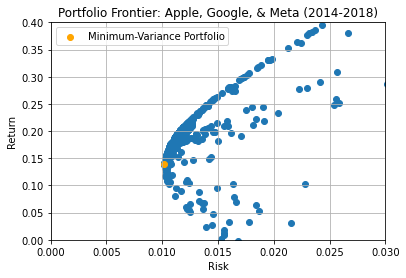

In [13]:
plt.scatter(x=graph_sig, y=graph_mu)
plt.title("Portfolio Frontier: Apple, Google, & Meta (2014-2018)")
plt.scatter(min(graph_sig), graph_mu[graph_sig.index(min(graph_sig))], c='orange', label='Minimum-Variance Portfolio')
plt.xlim([0, 0.03])
plt.ylim([0, 0.4])
plt.xlabel('Risk')
plt.ylabel('Return')
plt.grid()
plt.legend()
plt.savefig("output.jpg")

In [14]:
graph_mu[graph_sig.index(min(graph_sig))]

0.13866887560205

In [15]:
min(graph_sig)

0.010181257507426256

It shows that the return for this minimum variance portfolio is about 0.1387 with a standard deviation of approximately 0.0102.

Adding the Meta asset resulted in more inefficient portfolios for some range of risk. In other words, instead of a simple parabola-shaped curve like the 2-asset frontier portfolio graph, there exist portfolios that are scattered within the parabola-shaped outline in the 3-asset frontier portfolio graph.

Overall, this project highlights the intersection of finance and numerical analysis, specifically in relation to portfolio optimization.